In [1]:
"""This program will generate CDF and PDF distributions for a given dataset, allowing us to do survival analysis"""
import pandas as pd
import keras 
import numpy as np
import matplotlib.pyplot as plt
import sklearn    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import keras.backend as K

/home/abhishek/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class CDF:
    
   def  __init__(self,X,Y):
        
        import ANN
        self.X = X
        self.Y = Y
        np.random.seed(7)
        self.c = ANN.ANN(self.X,self.Y,[1,5,1],input_activation=None,hidden_layers_activation='tanh',output_activation='sigmoid',optimizer='RMSprop',epochs=30,batch_size=5)
       
   def predict_CDF(self,P):
        data = self.c.predict(P)
        data = np.array(data)
        survival = 1-data
        result = (np.all(np.diff(data) > 0))
        
        if(result==True):
            print("CDF obtained is monotonically increasing")
            plt.figure(0)
            plt.title('QQ plot')
            plt.xlabel('True CDF')
            plt.ylabel('Predicted CDF')
            plt.plot(self.Y,self.Y,label='true vs true')
            plt.plot(data,self.Y,label='pred vs true')
            plt.legend(loc='upper left')
            plt.figure(1)
            plt.title('CDF plot')
            plt.ylabel('CDF')
            plt.xlabel('Time to failure')
            plt.plot(P,data)
            plt.plot()
            return data
        
        else:
            print("CDF obtained is non-conformant to properties required")
            return data
        
   def predict_PDF(self,P):
        
        data = self.c.predict(P)
        data = np.array(data)
        P1   = np.array(P)
        PDF  = np.diff(data,axis=0)/np.diff(P,axis=0)
        PDF  = np.array(PDF)
        plt.xlabel('Time to failure')
        plt.ylabel('PDF')
        plt.plot(P[1:,:],PDF,label='obtained PDF')
        plt.legend(loc='upper left')
        """PDF2 = np.sort(PDF)
        PDF2 = np.array(PDF2)
        from scipy.integrate import simps
        from numpy import trapz
        area = (np.sum(PDF2)*(P[1]-P[0]))
        print("area under PDF curve is",area)
        """
        print("Pdf obtained is")
        return PDF

In [3]:
from scipy.stats import weibull_min
rv2= np.arange(0,10,0.01)
rv2n=(rv2-min(rv2))/(max(rv2)-min(rv2))
a=2
c=3
cdf2=weibull_min.cdf(rv2, a, loc=0, scale=c)
X = rv2n
X = np.array(X)
X = X.reshape(-1,1)
#X = scaler.fit_transform(X)
Y = cdf2
Y = np.array(Y)
Y = np.sort(Y)


In [4]:
r = CDF(X,Y)

(self,X,Y,nodes=,model=model,activation='softmax',loss='categorical_crossentropy',optimizer='adam',
         epochs=10,batch_size=200,kernel_init='normal') are the parameters of the constructors for class ANN
         
         X,Y and input_dim are the essential parameters.The remaining parameters are all optional.
         
         An example of a call to the constructor is :      c = ANN(X,Y,20)
         
         However, if we want to replace certain defaults,  c = ANN(X,Y,20,optimixer='RMSProp')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 18
Trainable par

CDF obtained is monotonically increasing


array([[0.04583537],
       [0.0462817 ],
       [0.04673298],
       [0.04718925],
       [0.04765059],
       [0.04811702],
       [0.04858864],
       [0.04906549],
       [0.04954761],
       [0.05003509],
       [0.05052795],
       [0.05102628],
       [0.05153013],
       [0.05203957],
       [0.05255466],
       [0.05307544],
       [0.053602  ],
       [0.05413437],
       [0.05467266],
       [0.05521688],
       [0.05576715],
       [0.0563235 ],
       [0.05688599],
       [0.05745471],
       [0.05802971],
       [0.05861106],
       [0.05919885],
       [0.0597931 ],
       [0.06039394],
       [0.06100137],
       [0.06161553],
       [0.06223644],
       [0.06286421],
       [0.06349888],
       [0.06414053],
       [0.06478924],
       [0.0654451 ],
       [0.06610814],
       [0.06677847],
       [0.06745615],
       [0.06814127],
       [0.0688339 ],
       [0.06953409],
       [0.07024196],
       [0.07095758],
       [0.07168098],
       [0.0724123 ],
       [0.073

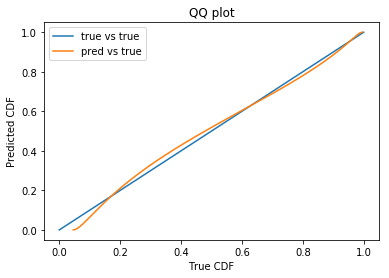

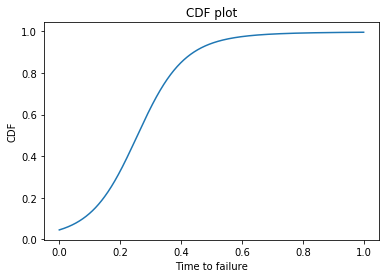

In [5]:
test = pd.read_csv('generate500.csv')
test = np.array(test)
test = np.sort(test)
#test = test.reshape(-1,1)
#test = scaler.fit_transform(test)
r.predict_CDF(X)

Pdf obtained is


array([[0.44588815],
       [0.45082294],
       [0.45581356],
       [0.46087861],
       [0.46596971],
       [0.47115013],
       [0.47636404],
       [0.48164494],
       [0.48698539],
       [0.49237049],
       [0.49783747],
       [0.50334539],
       [0.50893146],
       [0.51456963],
       [0.52026362],
       [0.52602833],
       [0.53183769],
       [0.53775126],
       [0.54367971],
       [0.54971237],
       [0.55580085],
       [0.56192282],
       [0.56815644],
       [0.57442356],
       [0.58076511],
       [0.58719969],
       [0.59365661],
       [0.60024378],
       [0.6068235 ],
       [0.61354093],
       [0.62029557],
       [0.62714325],
       [0.63402814],
       [0.6410098 ],
       [0.64805844],
       [0.65520385],
       [0.66238647],
       [0.66965841],
       [0.67699733],
       [0.68443302],
       [0.69194314],
       [0.69949047],
       [0.7071569 ],
       [0.71490519],
       [0.72267582],
       [0.73058787],
       [0.73857435],
       [0.746

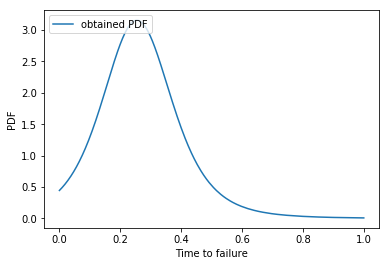

In [6]:
r.predict_PDF(X)